# Airline Passenger Satisfaction Prediction

In [1]:
import sklearn
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data set
df=pd.read_csv("test.csv")

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# 2 DATA PREPROCESSING
## 2.1 EDA

In [4]:
# checking wether the data set is imbalanced or not
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [5]:
df.shape

(25976, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [8]:
# removing the identical columns like "Unnamed: 0","id"
# because it dont impact the target,
# 
df=df.drop(columns=["Unnamed: 0","id"])

In [9]:
# checking nulls 
df.isna().sum()

# here this "Arrival Delay in Minutes" one column is only having the 83 null vaules

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [10]:
# # # filling the nulls 

# df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())


In [11]:
df.duplicated().sum()
df = df.drop_duplicates()


In [12]:
df.shape
# NO duplicates

(25976, 23)

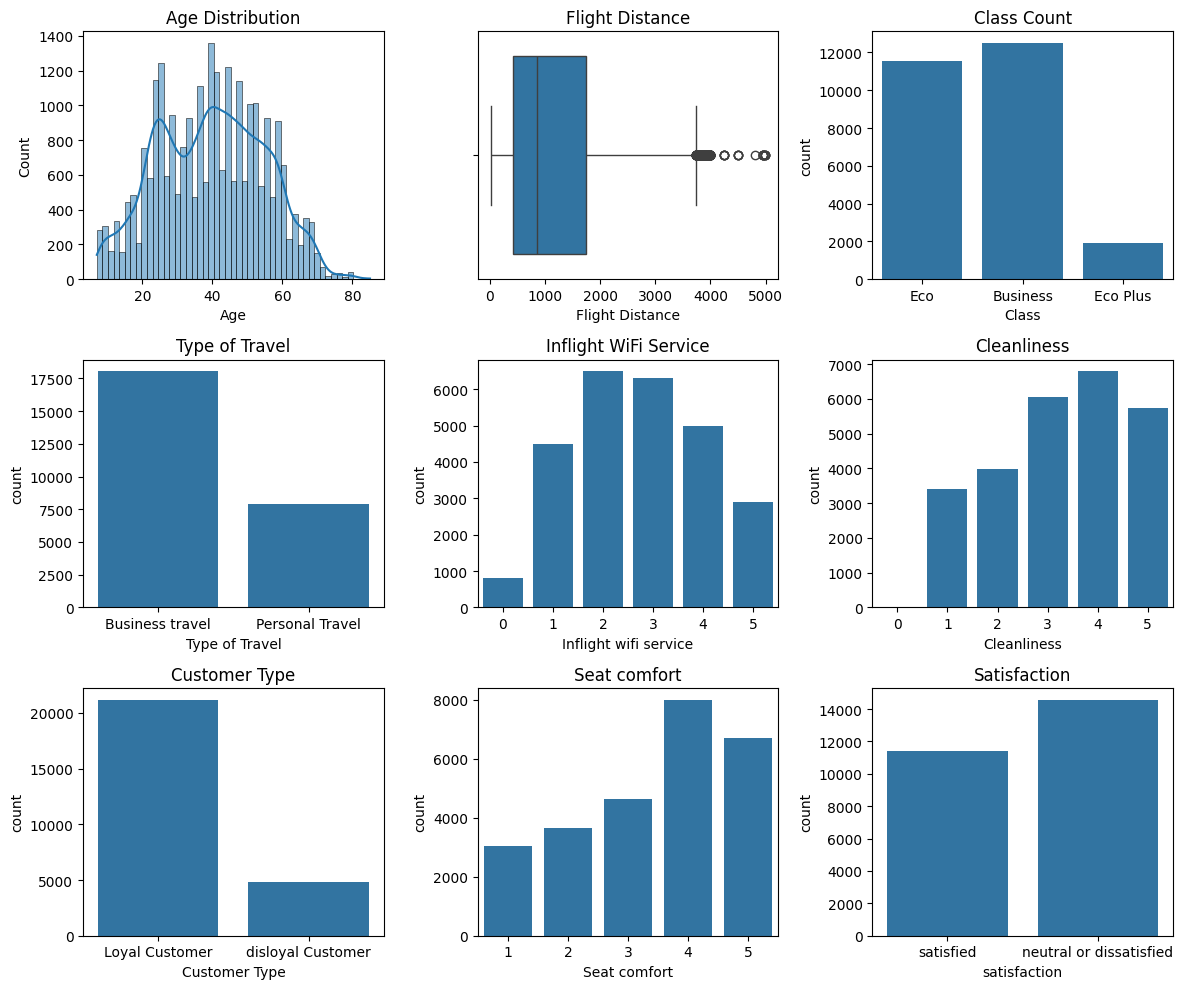

In [13]:
plt.figure(figsize=(12,10))

# 1st subplot – Histogram
plt.subplot(3, 3, 1)
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")

# 2nd subplot – Boxplot
plt.subplot(3, 3, 2)
sns.boxplot(x=df["Flight Distance"])
plt.title("Flight Distance")

# 3rd subplot – Countplot
plt.subplot(3, 3, 3)
sns.countplot(x=df["Class"])
plt.title("Class Count")

# 4th subplot – Countplot
plt.subplot(3, 3, 4)
sns.countplot(x=df["Type of Travel"])
plt.title("Type of Travel")

# 5th subplot – Countplot
plt.subplot(3, 3, 5)
sns.countplot(x=df["Inflight wifi service"])
plt.title("Inflight WiFi Service")

# 6th subplot – You can add more here (optional)
plt.subplot(3, 3, 6)
sns.countplot(x=df["Cleanliness"])
plt.title("Cleanliness")

# 7th subplot – Optional
plt.subplot(3, 3, 7)
sns.countplot(x=df["Customer Type"])
plt.title("Customer Type")

# 8th subplot – Optional
plt.subplot(3, 3, 8)
sns.countplot(x=df["Seat comfort"])
plt.title("Seat comfort")

# 9th subplot – Optional
plt.subplot(3, 3, 9)
sns.countplot(x=df["satisfaction"])
plt.title("Satisfaction")

plt.tight_layout()
plt.show()


In [14]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

cat_cols, num_cols


(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'],
 ['Age',
  'Flight Distance',
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking',
  'Gate location',
  'Food and drink',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Inflight service',
  'Cleanliness',
  'Departure Delay in Minutes',
  'Arrival Delay in Minutes'])

C:\Users\mbdin\AppData\Local\Temp\ipykernel_7632\3030096423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


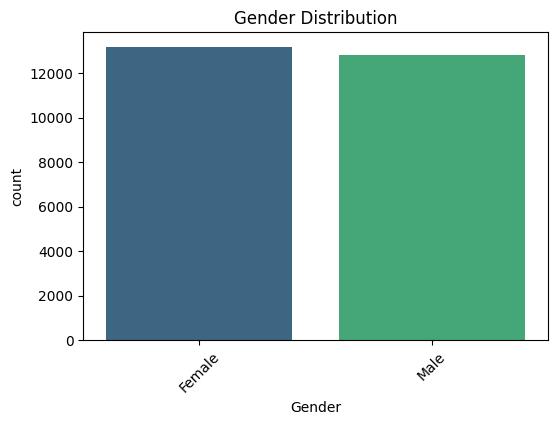

C:\Users\mbdin\AppData\Local\Temp\ipykernel_7632\3030096423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


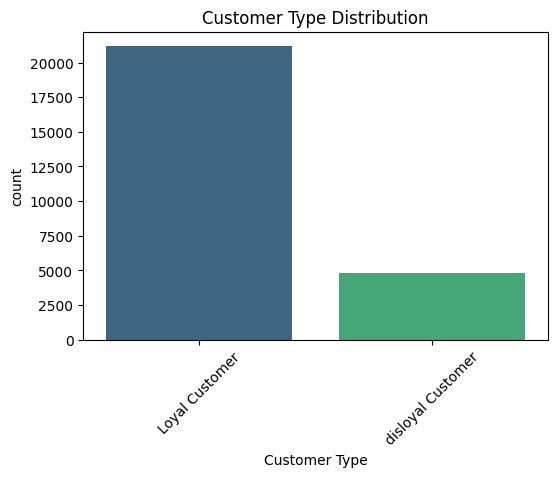

C:\Users\mbdin\AppData\Local\Temp\ipykernel_7632\3030096423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


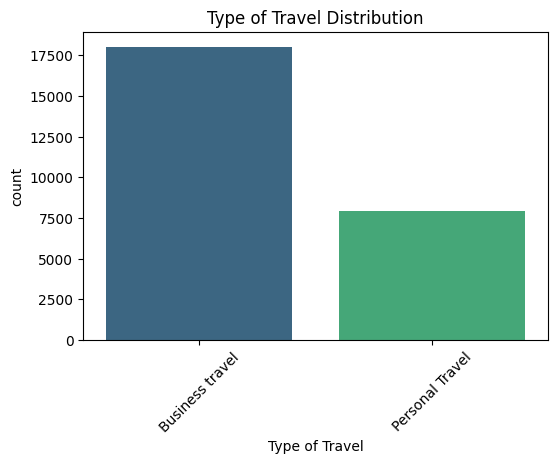

C:\Users\mbdin\AppData\Local\Temp\ipykernel_7632\3030096423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


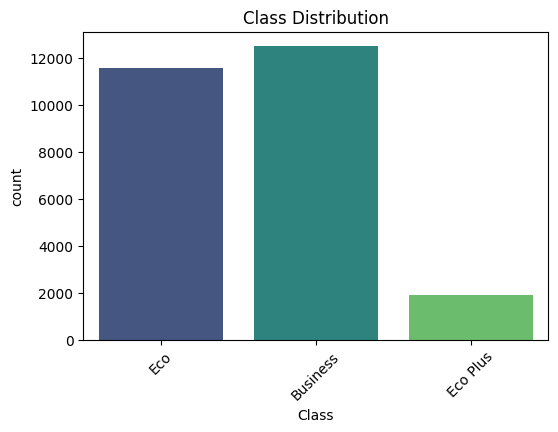

C:\Users\mbdin\AppData\Local\Temp\ipykernel_7632\3030096423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


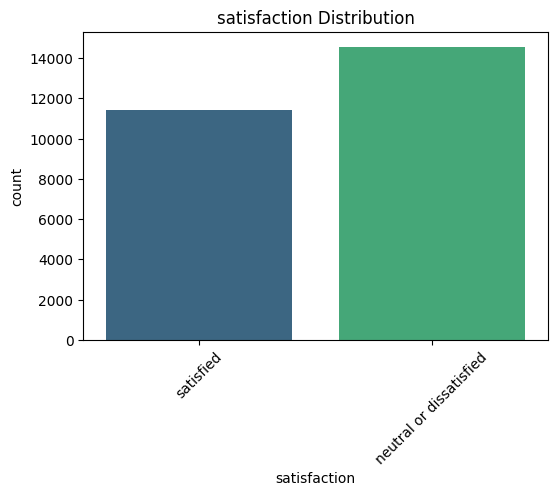

In [15]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()


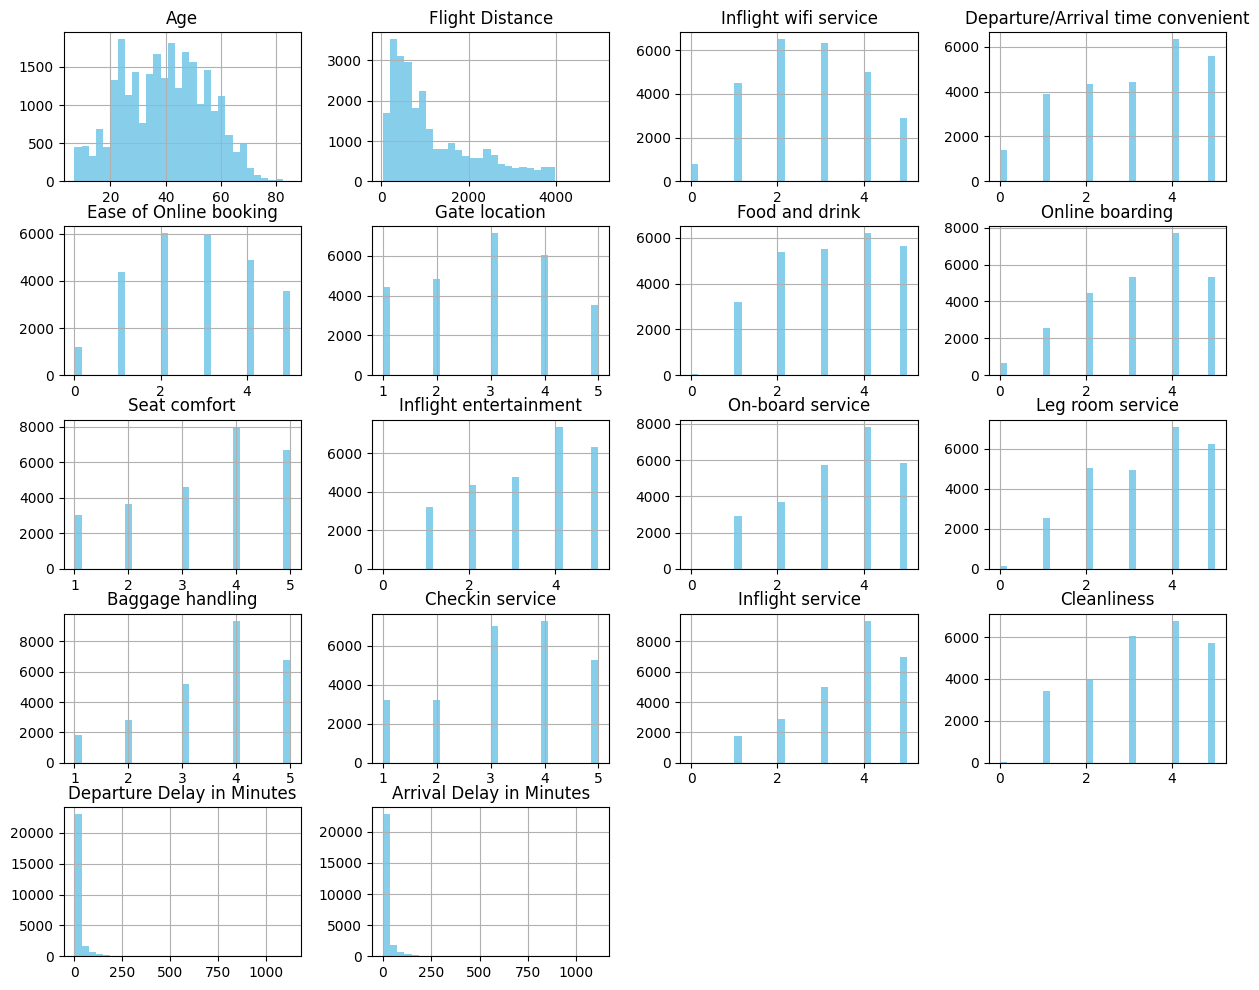

In [16]:
df[num_cols].hist(figsize=(15,12), bins=30, color='skyblue')
plt.show()


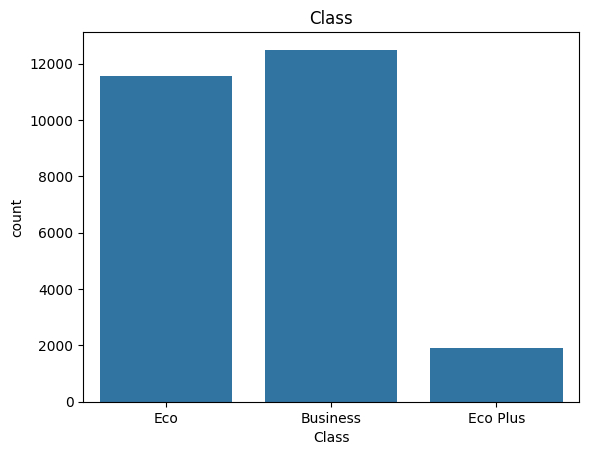

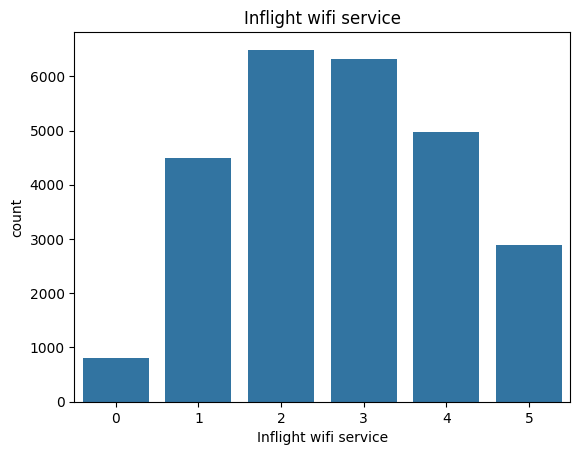

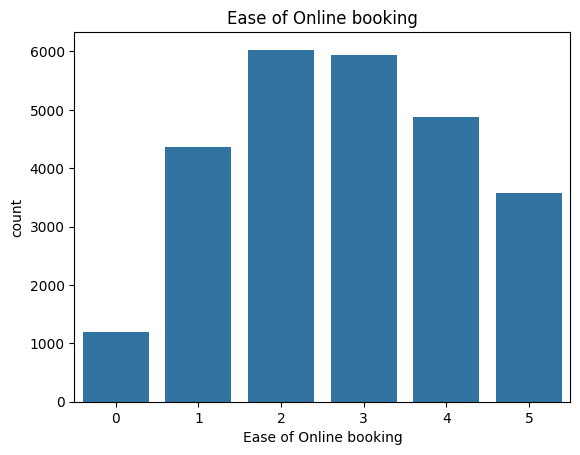

In [18]:
key_cat = ['Class', 'Inflight wifi service', 'Ease of Online booking']

for col in key_cat:
    sns.countplot(x=df[col])
    plt.title(col)
    plt.show()


# Bivariant

Text(0.5, 1.0, 'satisfaction vs Inflight entertainment')

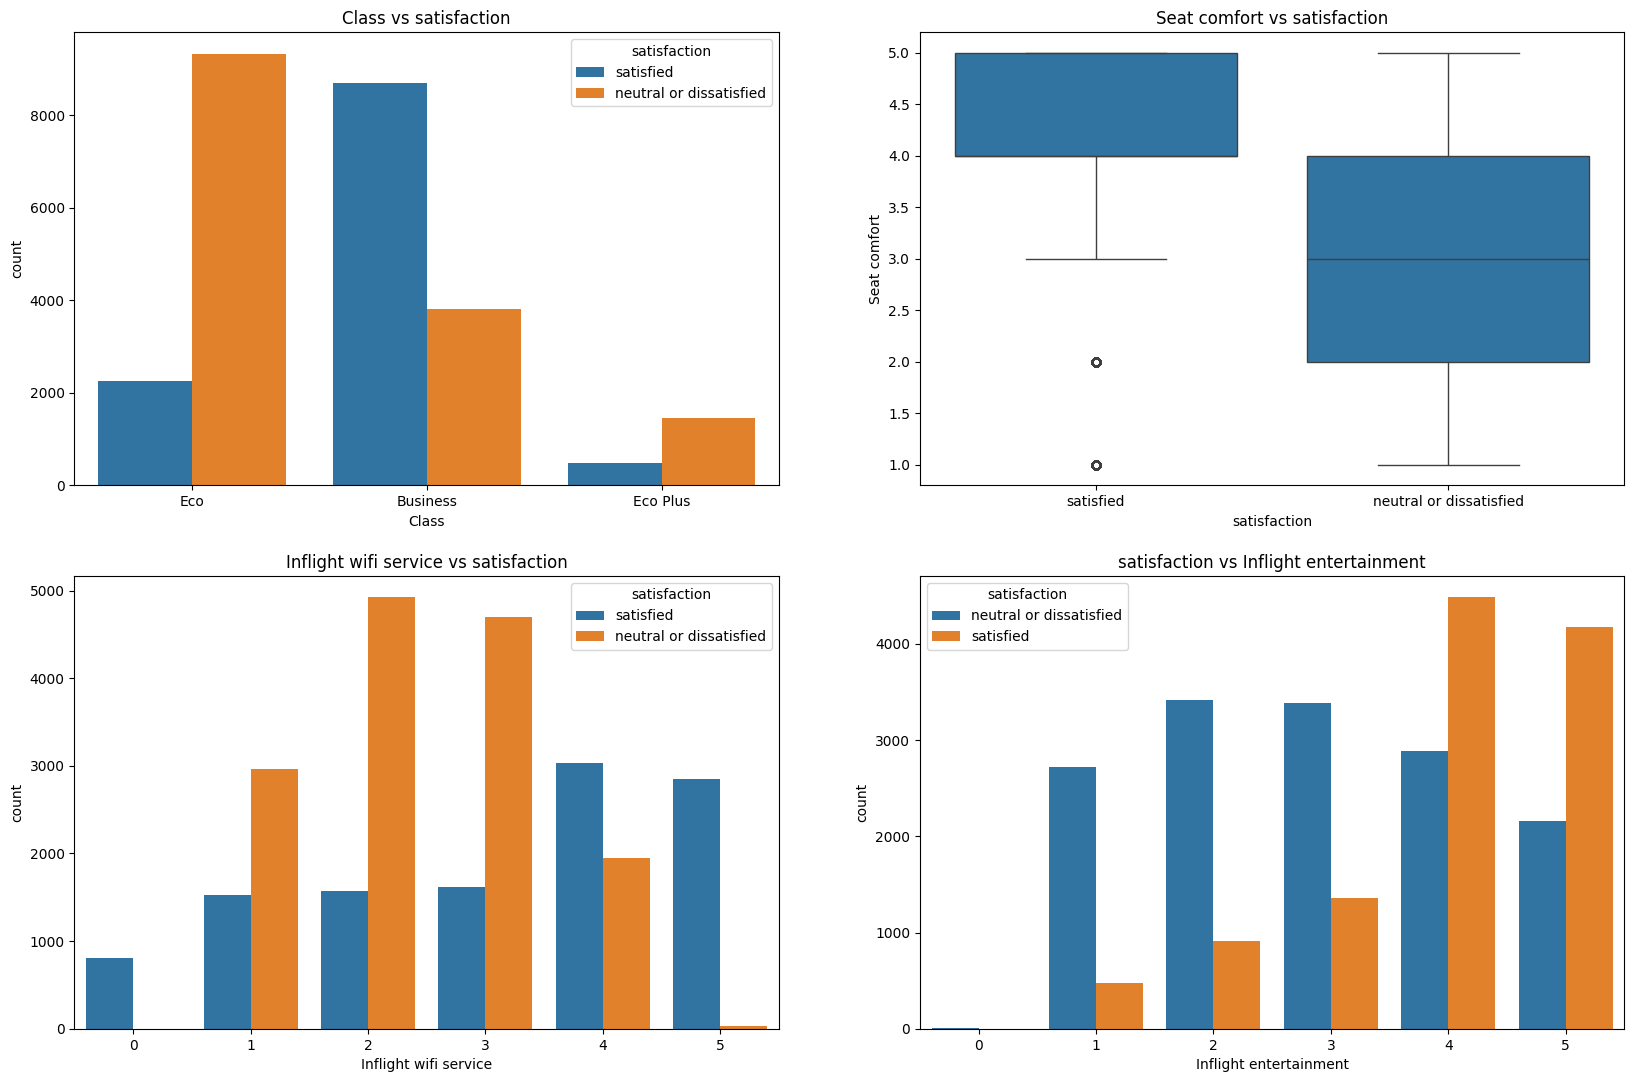

In [45]:
plt.figure(figsize=(20,20))


plt.subplot(3, 2, 1)

sns.countplot(x=df['Class'], hue=df['satisfaction'])
plt.title("Class vs satisfaction")

plt.subplot(3,2,2)
sns.boxplot(x=df['satisfaction'], y=df['Seat comfort'])
plt.title("Seat comfort vs satisfaction")

plt.subplot(3,2,3)
sns.countplot(x=df['Inflight wifi service'], hue=df['satisfaction'])
plt.title("Inflight wifi service vs satisfaction")

plt.subplot(3,2,4)
sns.countplot( x=df['Inflight entertainment'],hue=df['satisfaction'])
plt.title("satisfaction vs Inflight entertainment")


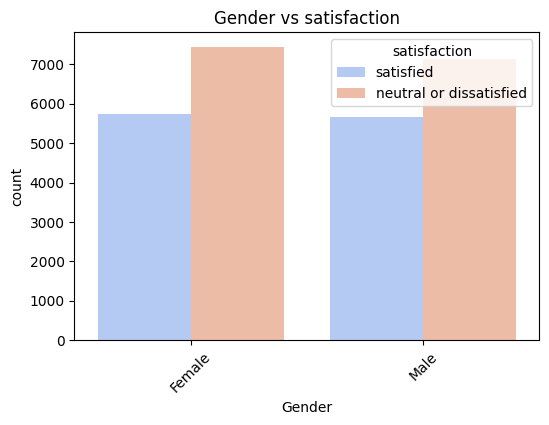

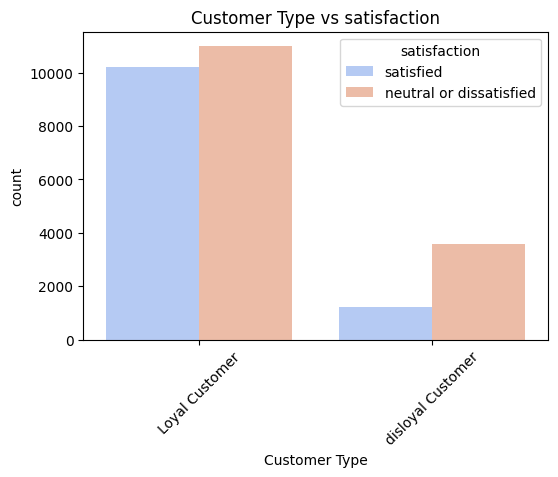

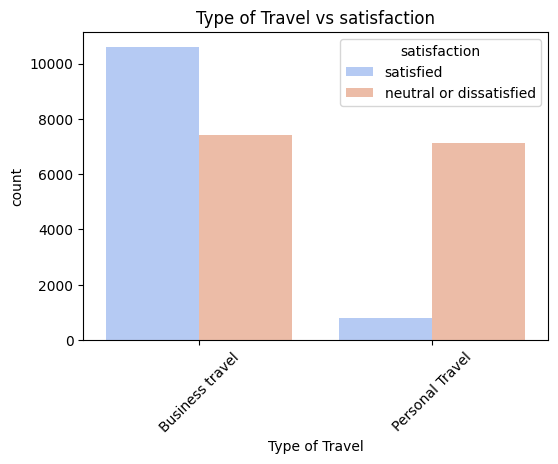

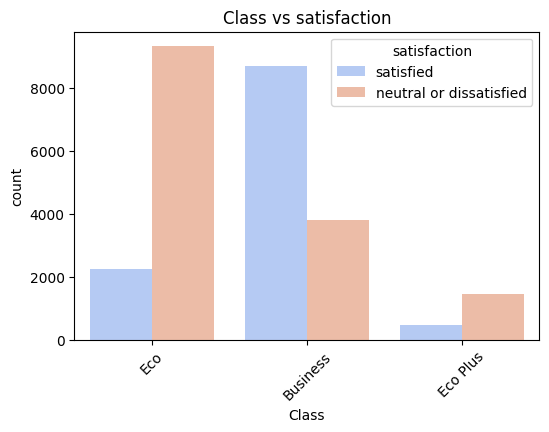

In [19]:
target = "satisfaction"

for col in cat_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue=target, palette="coolwarm")
        plt.title(f"{col} vs {target}")
        plt.xticks(rotation=45)
        plt.show()


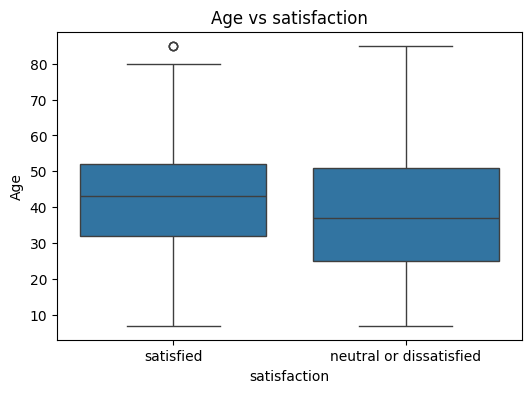

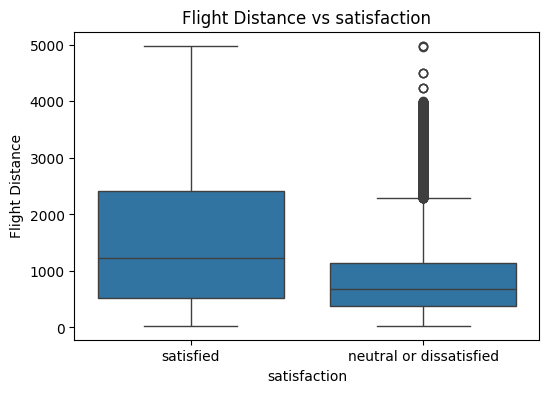

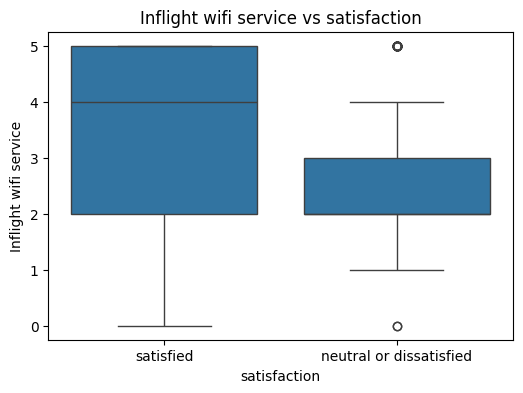

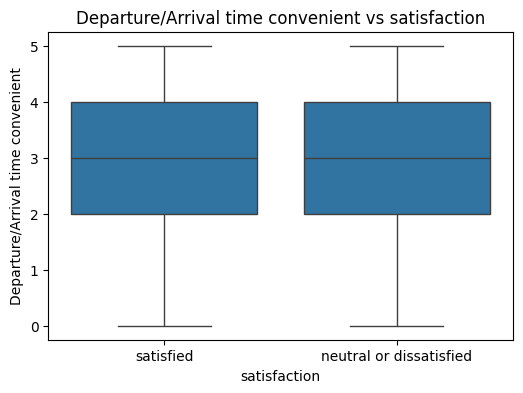

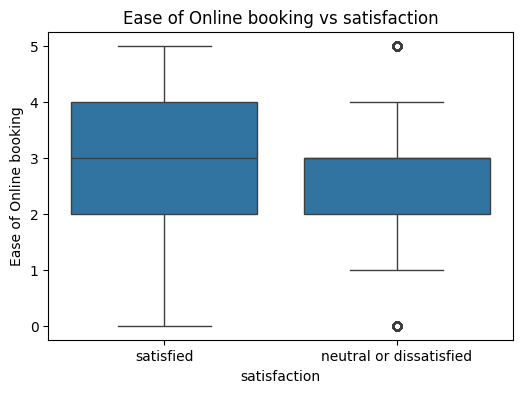

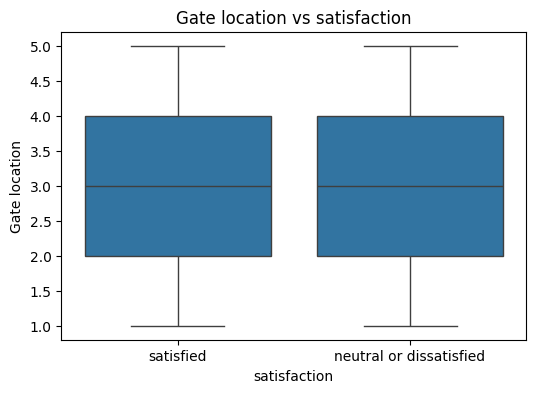

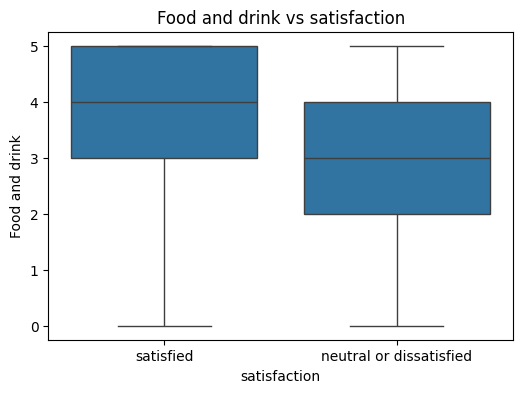

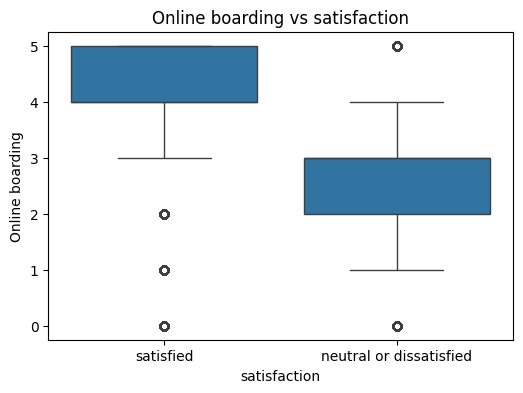

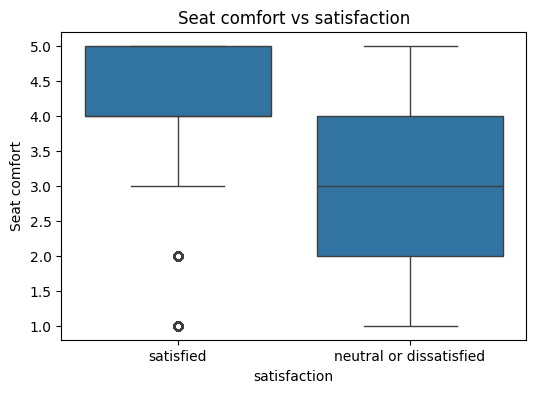

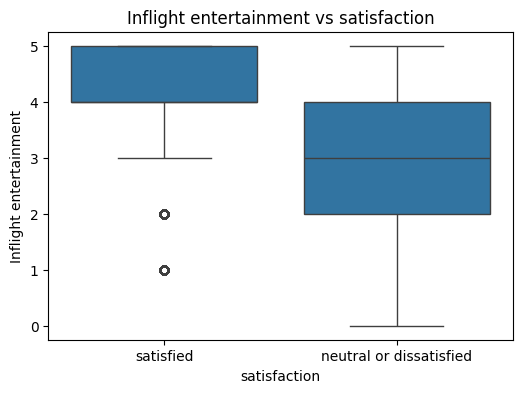

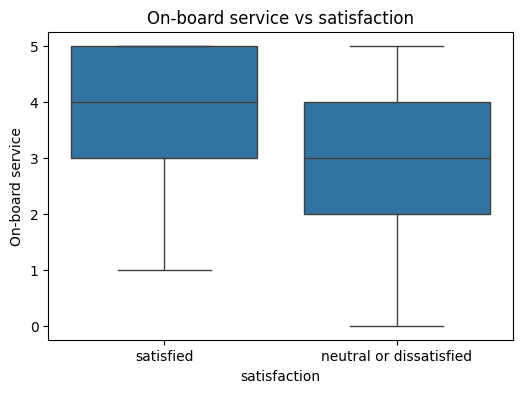

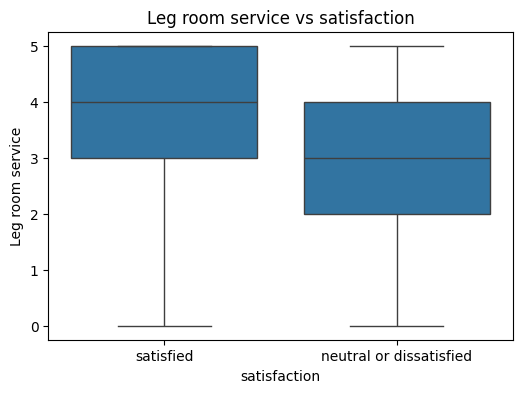

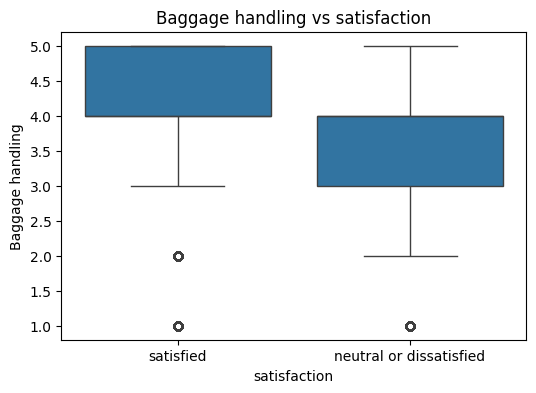

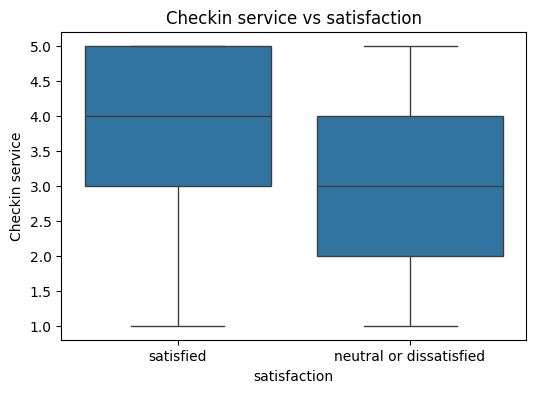

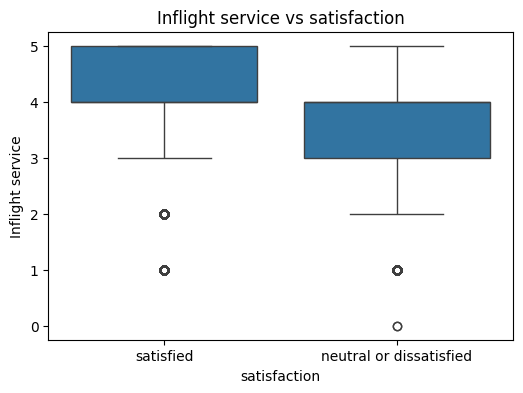

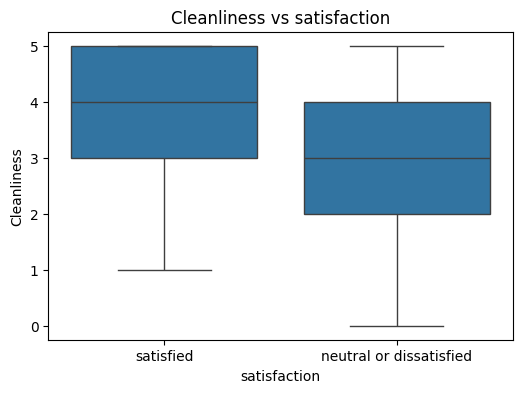

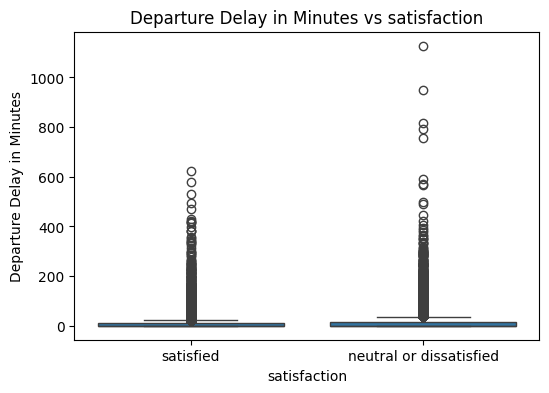

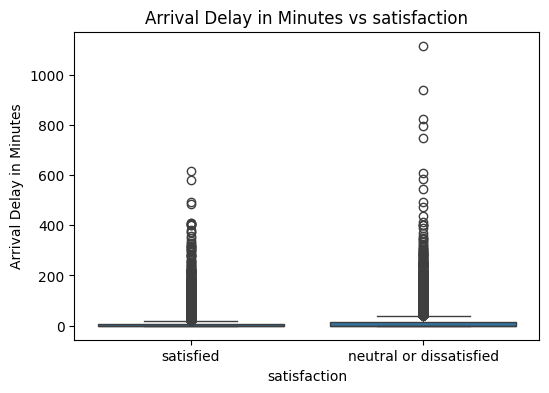

In [20]:
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=target, y=col)
        plt.title(f"{col} vs {target}")
        plt.show()


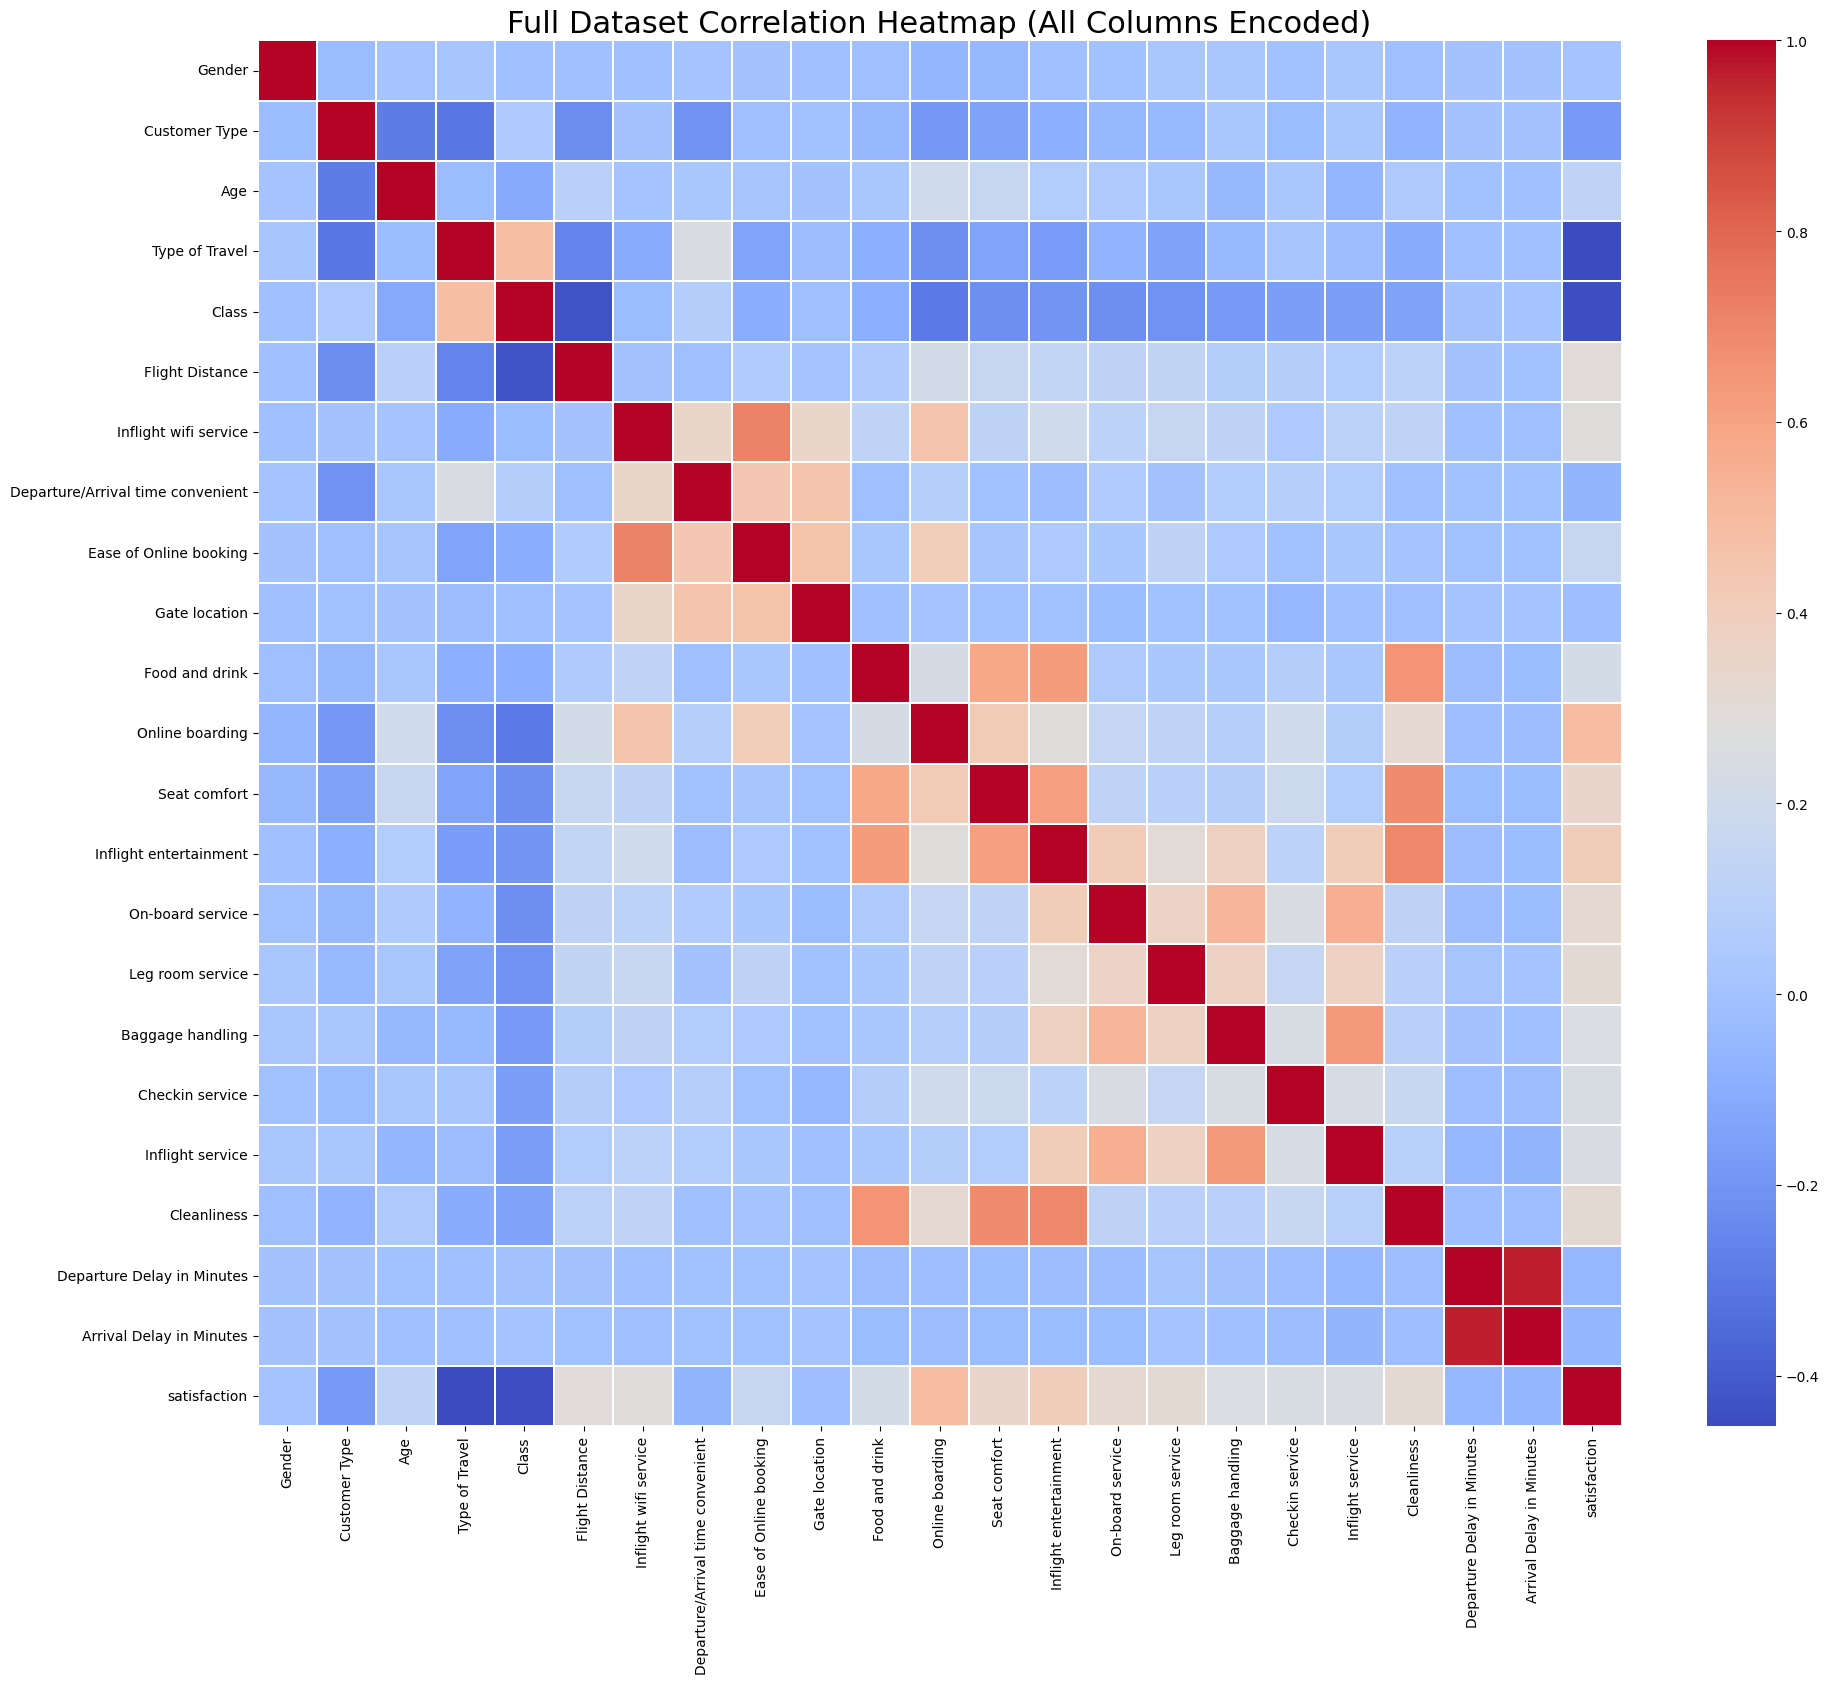

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

# 1️⃣ Encode ALL categorical columns automatically
label_encoder = LabelEncoder()

for col in df_copy.columns:
    if df_copy[col].dtype == "object":
        df_copy[col] = label_encoder.fit_transform(df_copy[col].astype(str))

# 2️⃣ Now ALL columns are numeric, so compute correlation
corr = df_copy.corr()

# 3️⃣ Plot heatmap
plt.figure(figsize=(22, 18))

sns.heatmap(
    corr,
    annot=False,          # Too many columns → use False for readability
    cmap="coolwarm",
    linewidths=0.3,
    cbar=True
)

plt.title("Full Dataset Correlation Heatmap (All Columns Encoded)", fontsize=22)
plt.show()


In [ ]:
# Multi co linearity in aeeival delay in minutes and departure delay in minutes

# satisfaction is highly corelated to type of travel,class

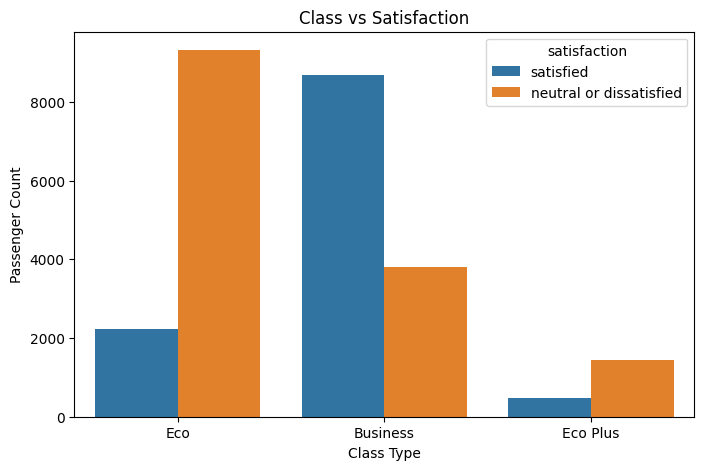

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Class', hue='satisfaction', data=df)
plt.title("Class vs Satisfaction")
plt.xlabel("Class Type")
plt.ylabel("Passenger Count")
plt.show()


C:\Users\mbdin\AppData\Local\Temp\ipykernel_7632\437015128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="satisfaction", palette="Set2")


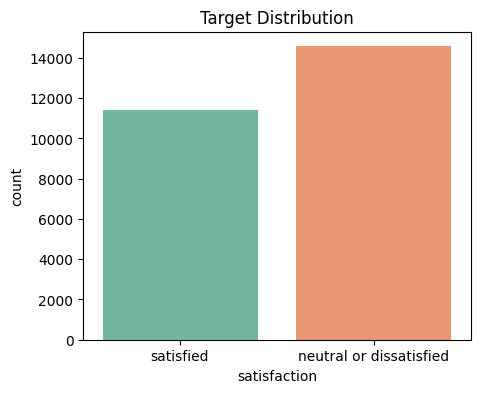

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="satisfaction", palette="Set2")
plt.title("Target Distribution")
plt.show()


In [25]:
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, "outliers:", len(outliers))


Age outliers: 0
Flight Distance outliers: 584
Inflight wifi service outliers: 0
Departure/Arrival time convenient outliers: 0
Ease of Online booking outliers: 0
Gate location outliers: 0
Food and drink outliers: 0
Online boarding outliers: 0
Seat comfort outliers: 0
Inflight entertainment outliers: 0
On-board service outliers: 0
Leg room service outliers: 0
Baggage handling outliers: 0
Checkin service outliers: 3218
Inflight service outliers: 0
Cleanliness outliers: 0
Departure Delay in Minutes outliers: 3569
Arrival Delay in Minutes outliers: 3538


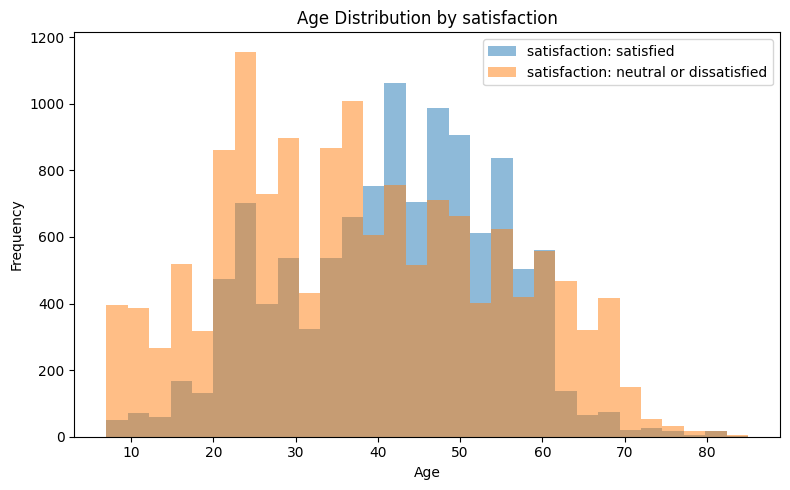

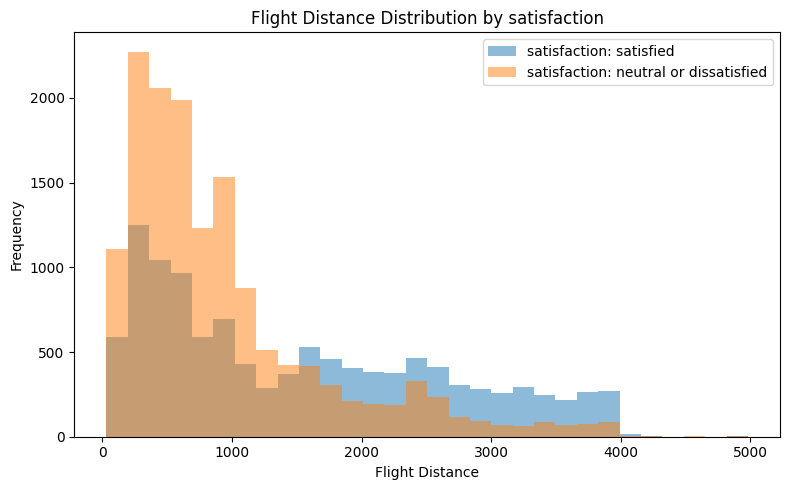

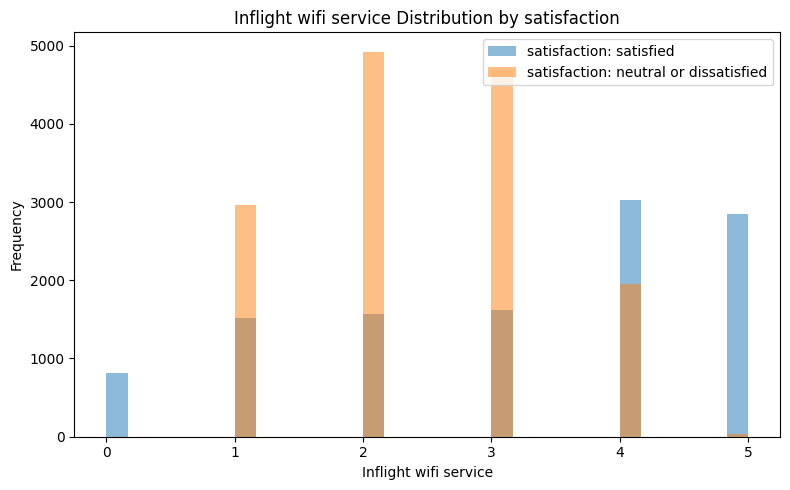

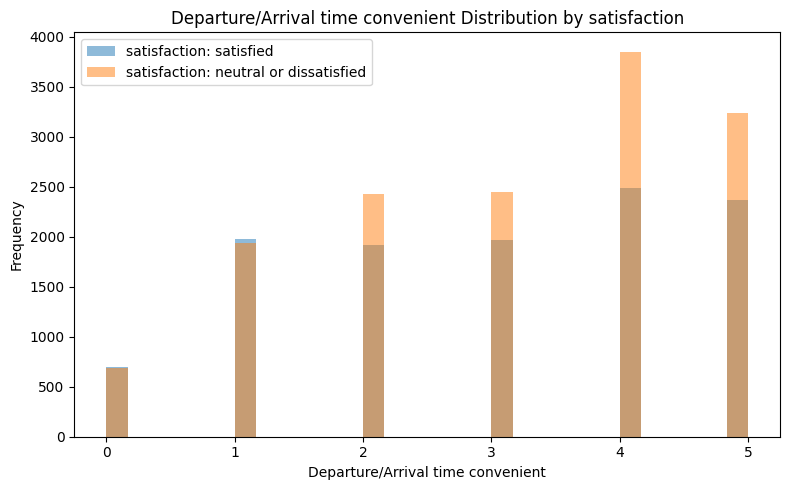

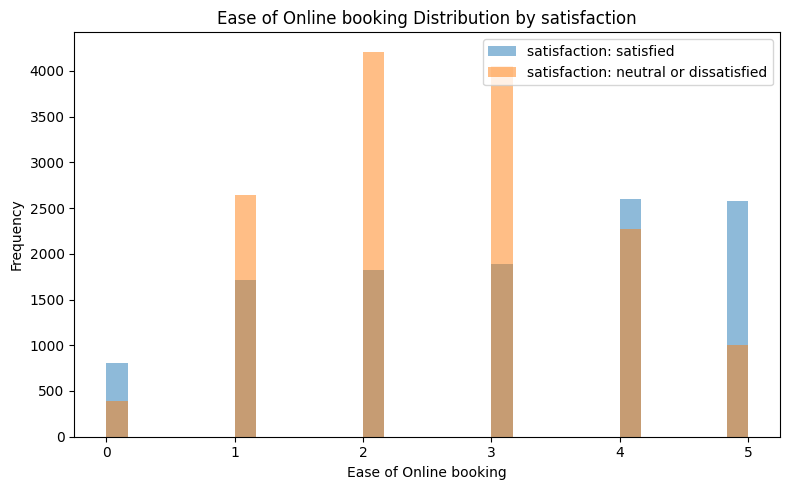

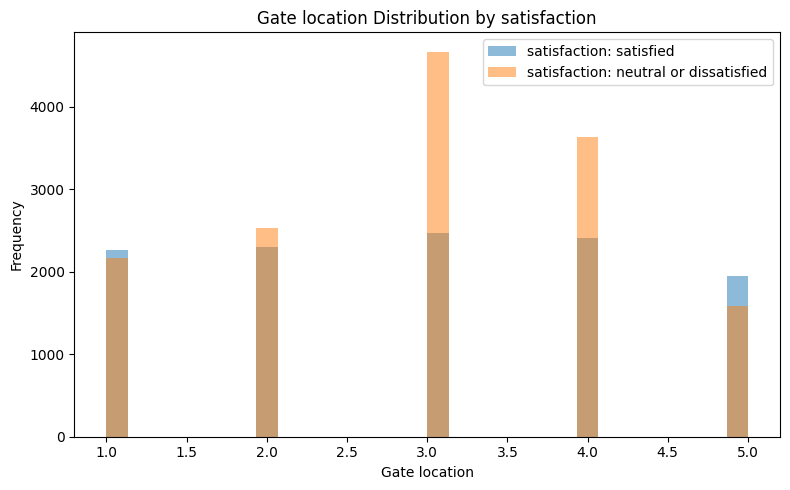

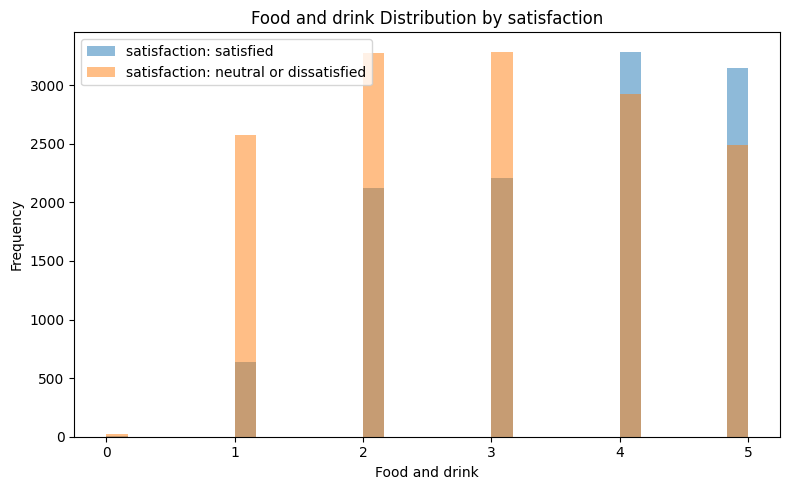

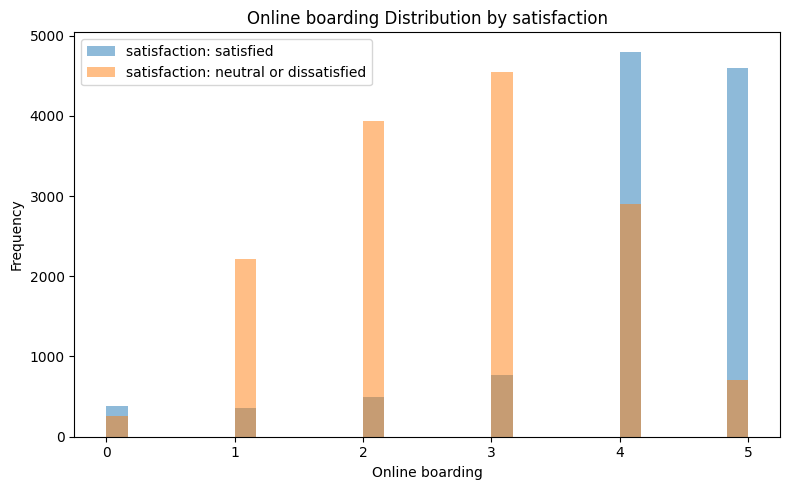

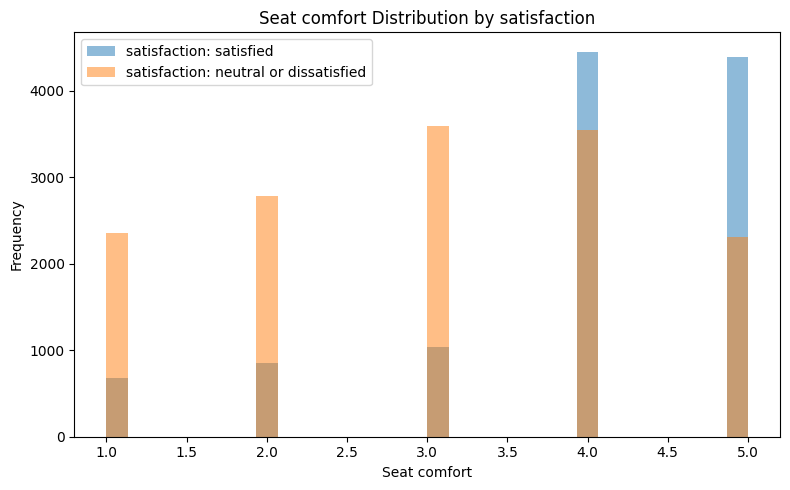

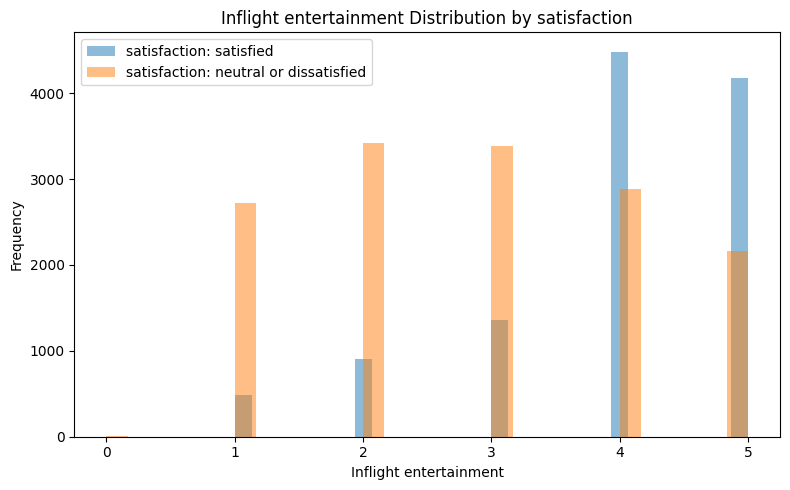

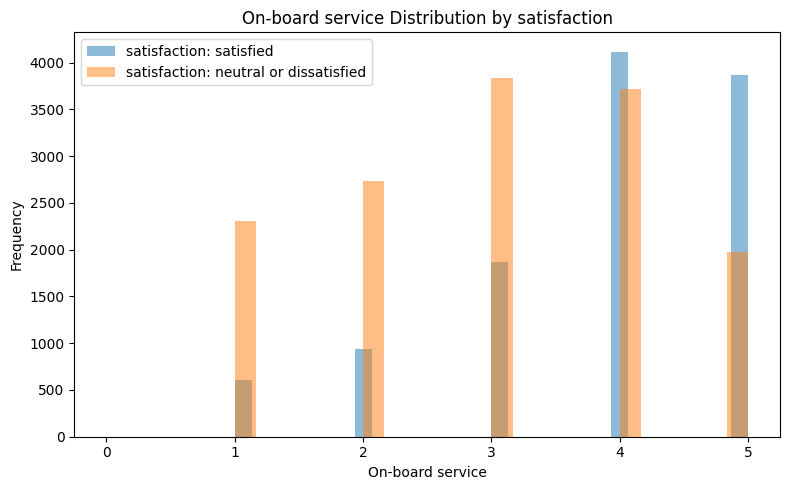

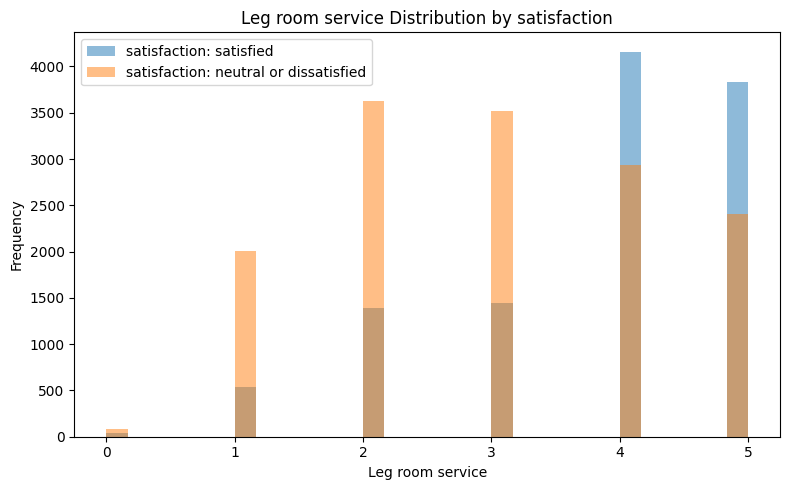

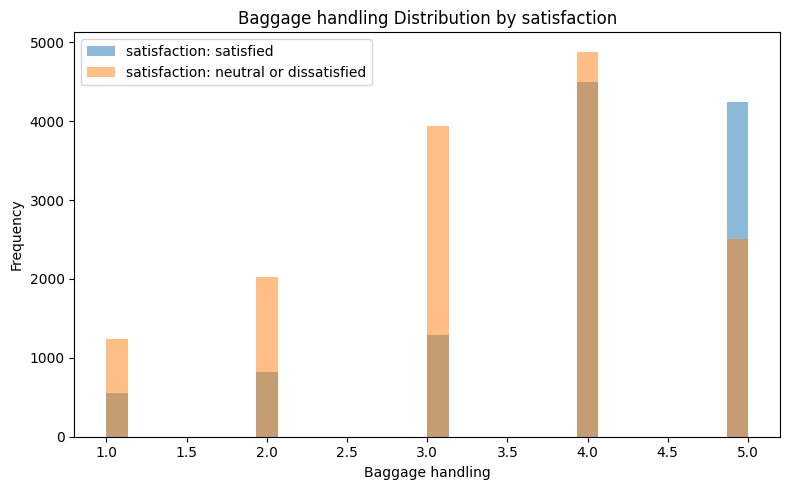

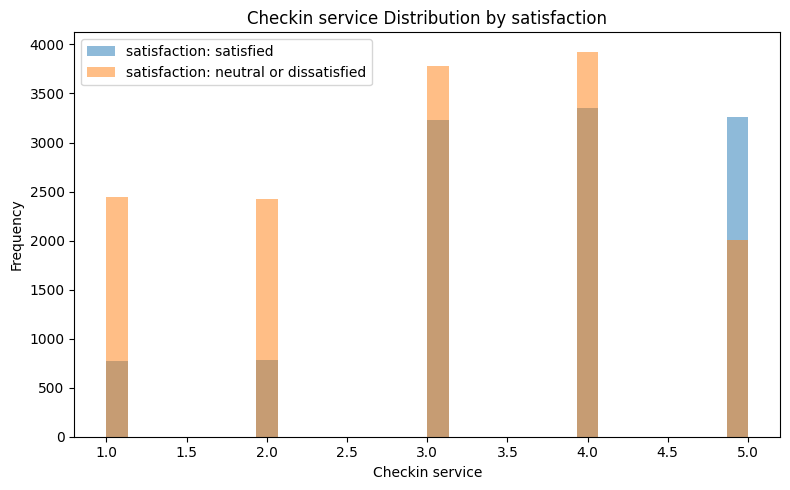

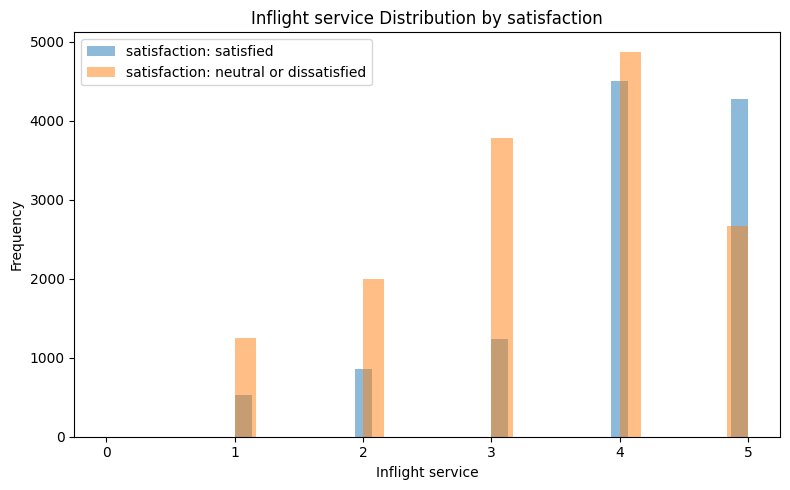

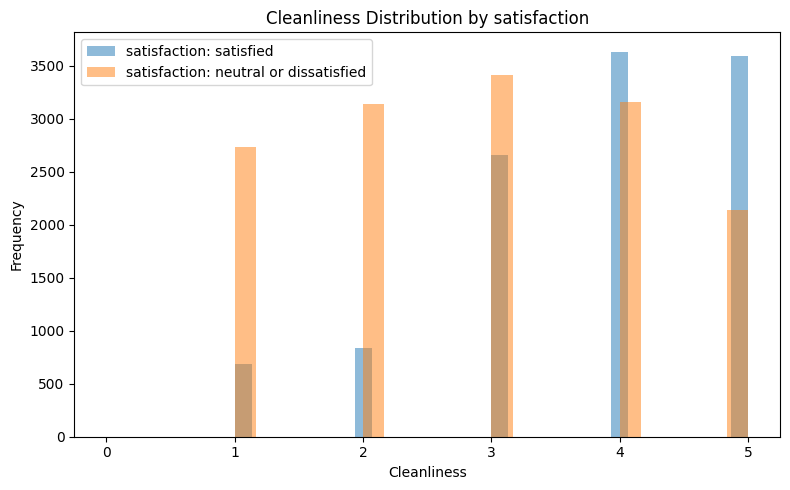

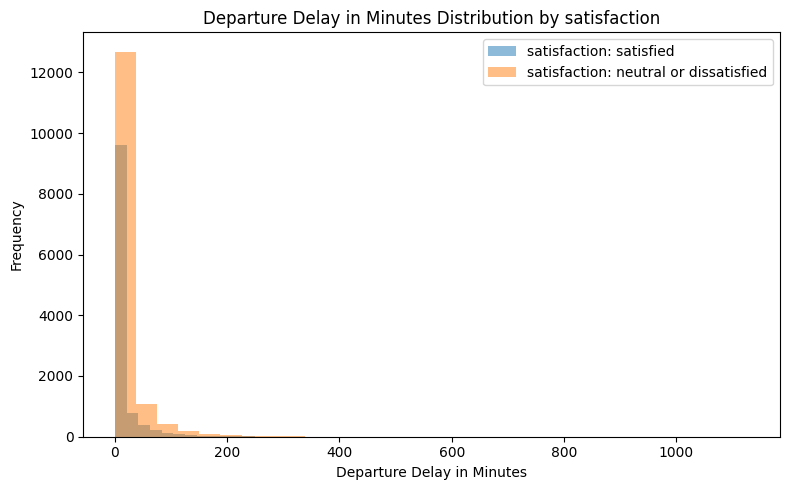

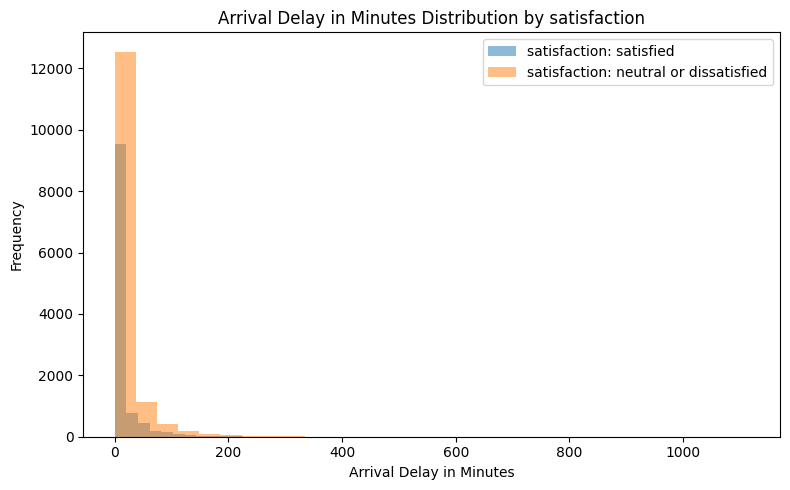

In [26]:

target = "satisfaction"

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target column if numeric
if target in numeric_cols:
    numeric_cols.remove(target)

# Plot histograms for all numeric columns vs target
for col in numeric_cols:
    plt.figure(figsize=(8,5))

    for label in df[target].unique():
        subset = df[df[target] == label]

        plt.hist(
            subset[col],
            bins=30,
            alpha=0.5,
            label=f"{target}: {label}"
        )

    plt.title(f"{col} Distribution by {target}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


## 